# IMPORT LIBRARIES/DATASETS AND PERFORMING DATA PROCESSING

In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers


In [ ]:
# loading the data
facialpoints_df = pd.read_csv('KeyFacialPoints.csv')

In [ ]:
facialpoints_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,64.301395,35.588540,31.708279,36.253693,58.647070,36.586270,68.957767,36.253693,37.029209,36.586270,...,54.320223,60.310326,74.500465,38.027163,74.500465,49.002419,69.512186,49.002419,81.817302,247 244 247 246 251 232 126 49 43 45 47 49 53 ...
341,65.819919,34.686282,28.963007,34.398282,58.621208,35.550282,72.441987,35.838282,36.262872,35.172081,...,49.667436,64.667919,71.542550,30.403007,71.542550,48.255141,65.495839,48.255141,79.029262,169 167 167 162 162 162 149 111 76 64 59 49 46...
342,67.340757,38.226746,30.814703,37.646984,60.383351,38.806508,72.268541,39.386270,37.192216,38.516627,...,56.408432,61.253189,77.940973,32.554378,77.361081,47.785297,74.407135,47.918270,81.999568,179 186 184 180 178 168 137 88 60 55 58 59 59 ...
343,69.477818,41.181576,27.441455,41.181576,62.110061,39.881503,76.411152,41.181576,35.241697,38.581333,...,59.383273,66.877091,76.717576,31.775030,77.151030,48.242424,71.517091,48.675879,87.118545,110 84 67 74 84 98 106 101 96 85 70 65 81 101 ...


In [ ]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          345 non-null    float64
 1   left_eye_center_y          345 non-null    float64
 2   right_eye_center_x         345 non-null    float64
 3   right_eye_center_y         345 non-null    float64
 4   left_eye_inner_corner_x    345 non-null    float64
 5   left_eye_inner_corner_y    345 non-null    float64
 6   left_eye_outer_corner_x    345 non-null    float64
 7   left_eye_outer_corner_y    345 non-null    float64
 8   right_eye_inner_corner_x   345 non-null    float64
 9   right_eye_inner_corner_y   345 non-null    float64
 10  right_eye_outer_corner_x   345 non-null    float64
 11  right_eye_outer_corner_y   345 non-null    float64
 12  left_eyebrow_inner_end_x   345 non-null    float64
 13  left_eyebrow_inner_end_y   345 non-null    float64

In [ ]:
facialpoints_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,66.228214,36.954210,29.794639,36.935320,60.068269,37.632653,72.562531,37.789464,35.933120,37.589884,...,47.893986,55.719592,62.511903,75.252173,33.756339,75.267444,47.899380,70.191012,47.948049,83.158521
std,1.679955,1.936317,1.710341,1.913441,1.431641,1.901004,2.152373,2.116987,1.439986,1.859105,...,2.088116,4.600955,2.868834,4.079482,2.562926,3.994230,1.876903,4.090742,2.179563,4.813376
min,60.278634,31.167686,24.467092,30.744155,55.744000,31.933800,66.208780,31.550743,31.316975,31.436129,...,41.765793,41.703080,54.357723,65.517988,24.841461,64.233198,41.205022,59.613277,39.638891,68.258370
25%,64.997189,35.531294,28.697250,35.880034,59.062673,36.305530,71.197161,36.265244,35.107862,36.473364,...,46.566054,52.715556,60.734400,72.447540,31.960421,72.612438,46.624278,67.487368,46.438519,79.795606
50%,66.074507,37.083524,29.953920,37.036640,59.997217,37.697113,72.475102,37.766551,36.074346,37.642200,...,47.884549,55.857894,62.469903,74.859692,33.911688,75.037808,47.785297,70.155000,47.808640,82.811836
75%,67.217795,38.325016,30.911342,38.067512,60.956198,38.894961,73.716741,39.336431,36.930857,38.733933,...,49.255881,58.996293,64.348632,77.845440,35.555368,77.809137,49.021091,72.597787,49.222919,85.912344
max,72.353185,41.658592,34.209750,41.962267,64.760765,42.420426,80.681354,42.874141,39.572250,43.637787,...,57.400662,70.091687,71.475757,86.435752,42.489756,85.840552,55.744000,80.865846,57.837268,95.364414


In [ ]:
#sample image
facialpoints_df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [ ]:
import numpy as np

# Since values for the image is given as space separated string, separating the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96) if len(np.fromstring(x, dtype= int, sep = ' ')) == 9216 else None)
#Added a conditional check to handle cases where the array size is not 9216 (96*96), replacing them with None

In [ ]:
# Let's obtain the shape of the resized image
facialpoints_df['Image'][1].shape

(96, 96)

In [ ]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        1
dtype: int64

# PERFORMING IMAGE VISUALIZATION

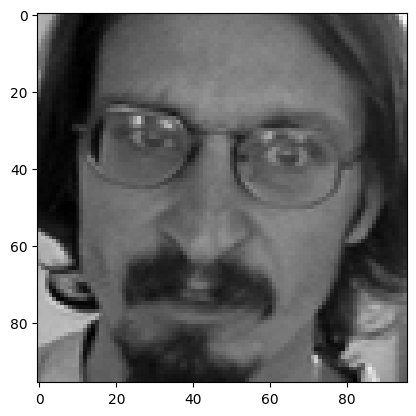

In [ ]:
# Plotting a random image from the dataset along with facial keypoints.
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')


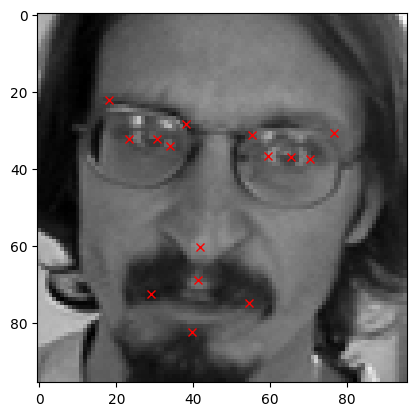

In [ ]:
# The (x, y) coordinates for the 15 key features are plotted on top of the image
# A for loop is used, starting from index = 1 to 32 with step of 2
# In the first iteration j would be 1, followed by 3 and so on.
# x-coordinates=even columns(0,2,4,..) and y-coordinates=odd columns(1,3,5,..)

plt.figure()
plt.imshow(facialpoints_df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')


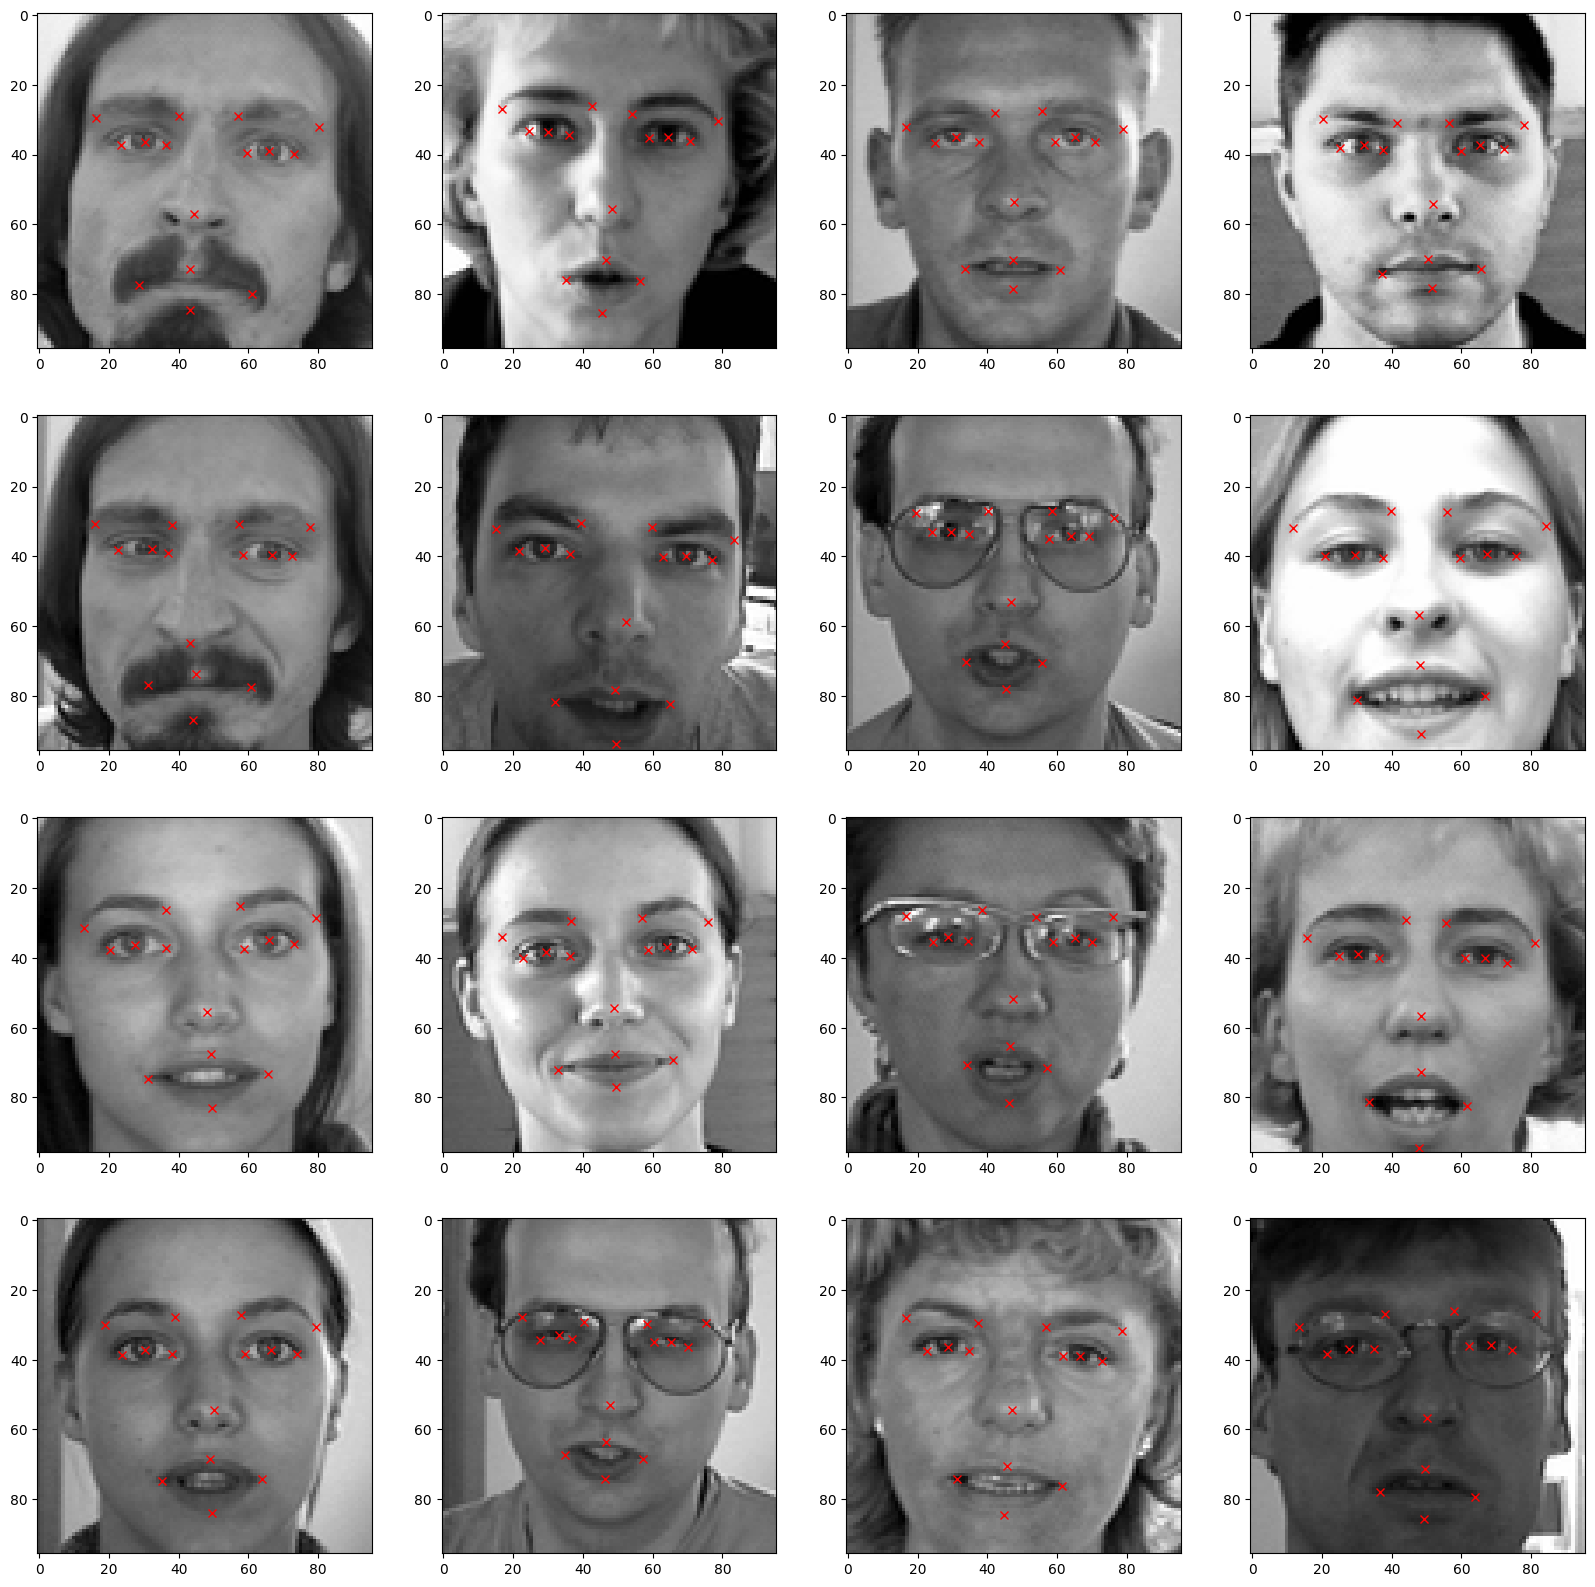

In [ ]:
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')


#  PERFORMING IMAGE AUGMENTATION

In [ ]:
# Creating a new copy of the dataframe
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)

In [ ]:
#Obtaining the header of the DataFrame (names of columns)
columns = facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# Displaying pixel values of images
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

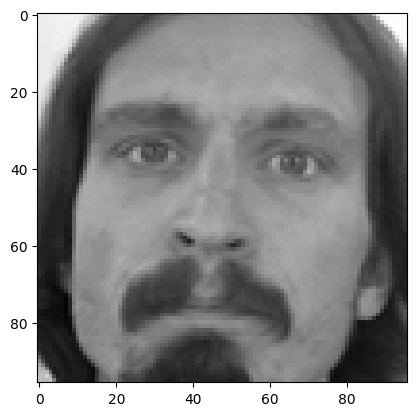

In [ ]:
# Plotting the sample image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')

In [ ]:
# Flipping the image column horizontally, handling potential None values
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis=1) if x is not None and x.ndim > 0 else x)

In [ ]:
 # Seeing if the values of pixels are now also flipped
facialpoints_df_copy['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

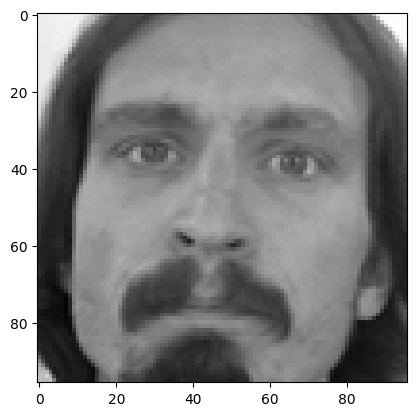

In [ ]:
# The image is flipped now
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')

In [ ]:
# Since images are flipped horizontally, y coordinate values would be the same
# X coordinate values only would need to change, by subtracting initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

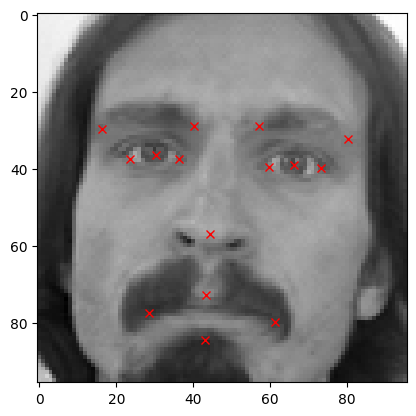

In [ ]:
# Viewing the Original image
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

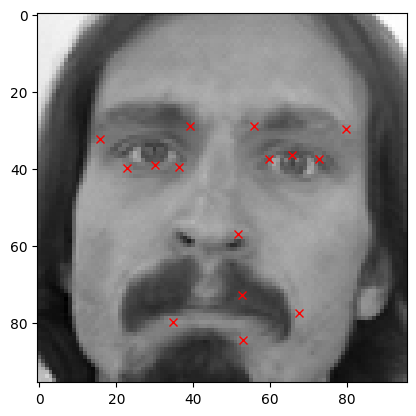

In [ ]:
# Viewing the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [ ]:
# Concatenating the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))

In [ ]:
facialpoints_df_augmented.shape

(690, 31)

In [ ]:
# Performing another image augmentation by randomly increasing images brightness
# Multiplying pixel values by random values between 1 and 2 to increase the brightness of the image
# Clipping the value between 0 and 255

import random
import numpy as np

facialpoints_df_copy = copy.copy(facialpoints_df)
# Handle potential None values in the 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1, 2) * x, 0.0, 255.0) if x is not None else None)
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(1035, 31)

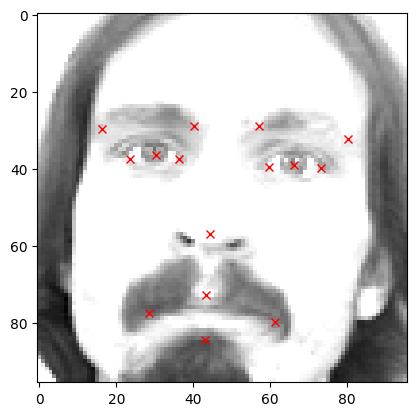

In [ ]:
# Viewing image with increased brightness

plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [ ]:
# Randomly decreasing image brightness
# Multiplying pixel values by random values between 0 and 1 to decrease the brightness of the image
# Clip the value between 0 and 255

import random
import numpy as np

facialpoints_df_copy = copy.copy(facialpoints_df)
# Handling potential None values in the 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x: np.clip(random.uniform(0, 0.2) * x, 0.0, 255.0) if x is not None else None) # Handle None values
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(1380, 31)

In [ ]:
facialpoints_df['Image'][0],

(array([[238, 236, 237, ..., 250, 250, 250],
        [235, 238, 236, ..., 249, 250, 251],
        [237, 236, 237, ..., 251, 251, 250],
        ...,
        [186, 183, 181, ...,  52,  57,  60],
        [189, 188, 207, ...,  61,  69,  78],
        [191, 184, 184, ...,  70,  75,  90]]),)

In [ ]:
facialpoints_df_copy['Image'][0]

array([[13.06344623, 12.95366937, 13.0085578 , ..., 13.72210739,
        13.72210739, 13.72210739],
       [12.89878094, 13.06344623, 12.95366937, ..., 13.66721896,
        13.72210739, 13.77699581],
       [13.0085578 , 12.95366937, 13.0085578 , ..., 13.77699581,
        13.77699581, 13.72210739],
       ...,
       [10.20924789, 10.04458261,  9.93480575, ...,  2.85419834,
         3.12864048,  3.29330577],
       [10.37391318, 10.31902475, 11.36190492, ...,  3.3481942 ,
         3.78730164,  4.2812975 ],
       [10.48369004, 10.09947104, 10.09947104, ...,  3.84219007,
         4.11663222,  4.93995866]])

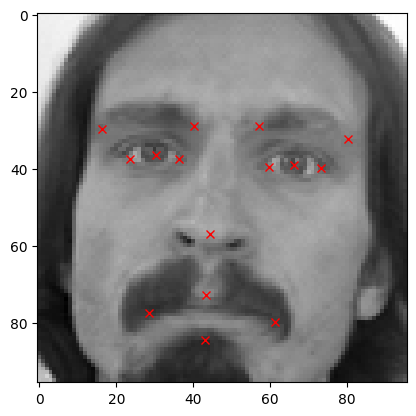

In [ ]:
# Viewing a sample image with decreased brightness decreased image
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [ ]:
facialpoints_df_copy = copy.copy(facialpoints_df)

In [ ]:
# Flipping the image column vertically (note that axis = 0)
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0) if x is not None and x.ndim > 0 else x)

In [ ]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [ ]:
facialpoints_df_copy['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [ ]:
# Since images are flipped vertically, x coordinate values would be the same
# y coordinate values only would need to change, by subtracting initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

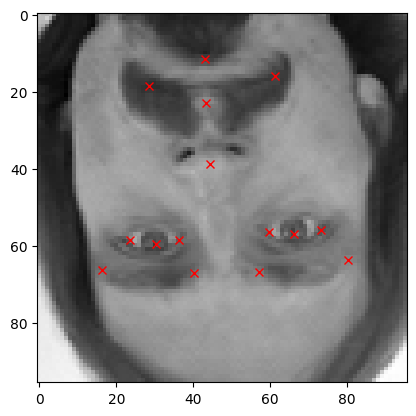

In [ ]:
# Viewing the Vertically flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

# PERFORMING NORMALIZATION AND TRAINING DATA PREPARATION

In [ ]:
# Obtaining the value of 'Images' and normalize it
#'Images' are in the 31st column but since indexing start from 0, referring 31st column by 30
img = facialpoints_df_augmented[:, 30]

# Iterating over each image in 'img' and normalize it
normalized_images = []
corresponding_coordinates = [] # Initialize a list to store coordinates corresponding to valid images
for i, image_array in enumerate(img): # Use enumerate to get index and value
    # Check if image_array is not None before processing
    if image_array is not None:
        normalized_image = image_array.astype('float32') / 255.0
        normalized_images.append(normalized_image)
        corresponding_coordinates.append(facialpoints_df_augmented[i, :30]) # Store coordinates
    else:
        print("Warning: Encountered a None image. Skipping.")

# Stacking the normalized images into a NumPy array
img = np.stack(normalized_images, axis=0)

# Creating an empty array of shape (number of valid images, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

# Iterating through the normalized images list and adding image values to the empty array
# Expanding it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Converting the array type to float32
X = np.asarray(X).astype(np.float32)
print(X.shape)

# Obtaining the values of key face points coordinates, which are to used as target.
# Use the coordinates corresponding to valid images
y = np.asarray(corresponding_coordinates).astype(np.float32) # Use the filtered coordinates
print(y.shape)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) # Now X and y have the same number of samples

(1376, 96, 96, 1)
(1376, 30)


In [ ]:
# Obtaining the values of key face points coordinates, which are to used as target.
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(1380, 30)

In [ ]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(1238, 96, 96, 1)

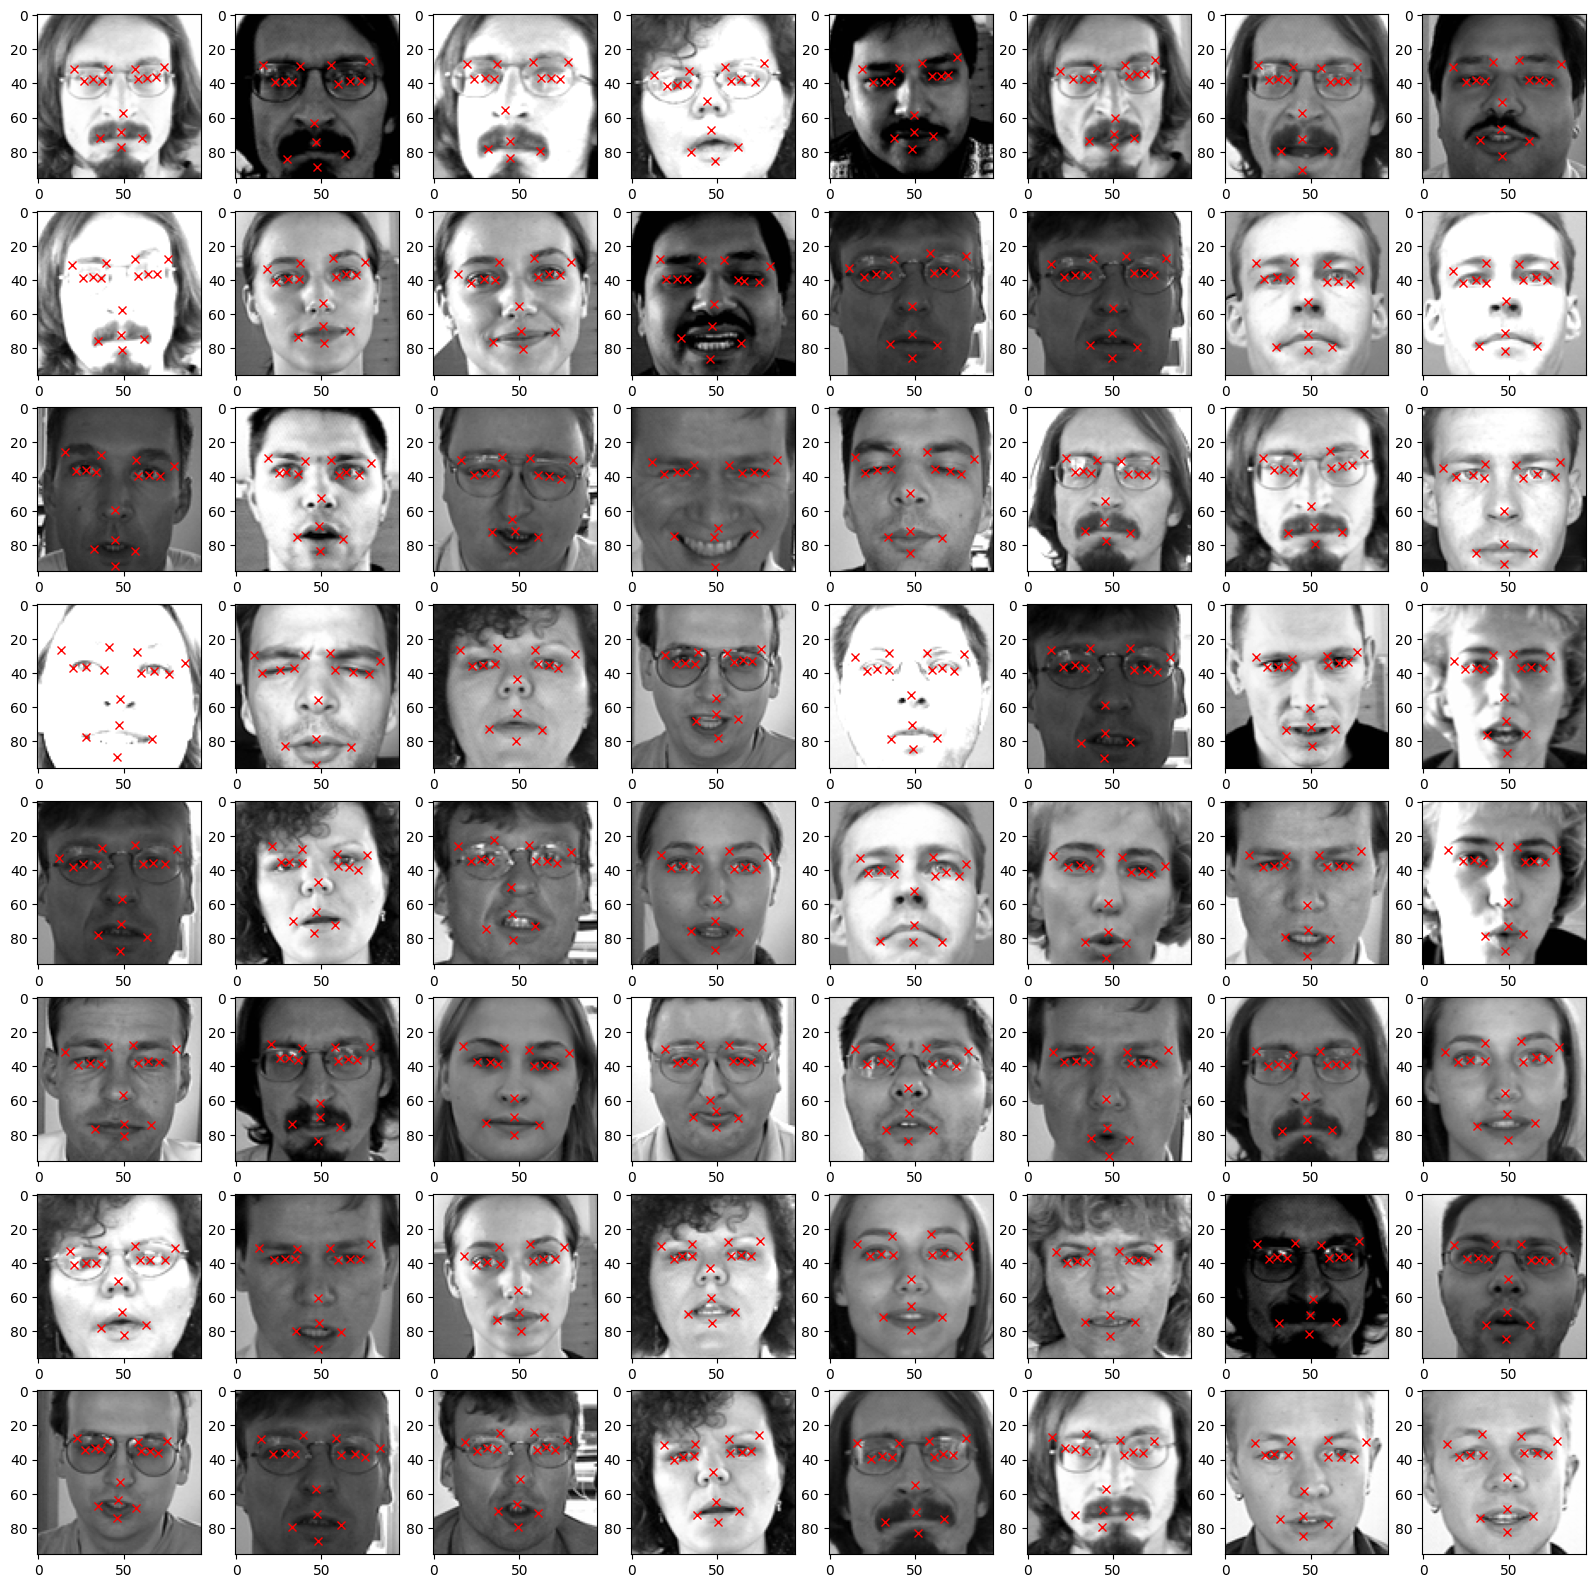

In [ ]:
#Visualising images in grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')


# BUILDING DEEP RESIDUAL NEURAL NETWORK MODEL

In [ ]:
def res_block(X, filter, stage):

  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 1
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

# COMPILING AND TRAINING DEEP LEARNING MODEL

In [ ]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [ ]:
# Saving the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 256, epochs= 10, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 1308.6947 - accuracy: 0.4541
Epoch 1: val_loss improved from inf to 2499.02124, saving model to weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 43s 7s/step - loss: 1308.6947 - accuracy: 0.4541 - val_loss: 2499.0212 - val_accuracy: 0.9194
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 321.6731 - accuracy: 0.1862
Epoch 2: val_loss improved from 2499.02124 to 2418.98096, saving model to weights.hdf5
5/5 [==============================] - 33s 7s/step - loss: 321.6731 - accuracy: 0.1862 - val_loss: 2418.9810 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 181.0513 - accuracy: 0.3656
Epoch 3: val_loss improved from 2418.98096 to 2310.58008, saving model to weights.hdf5
5/5 [==============================] - 32s 6s/step - loss: 181.0513 - accuracy: 0.3656 - val_loss: 2310.5801 - val_accuracy: 0.9194
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 161.6780 - accuracy: 0.7976
Epoch 4: val_loss improved from 2310.58008 to 2215.19971, saving model to weights.hdf5
5/5 [==============================] - 33s 6s/step - los

# ASSESSING TRAINED MODEL PERFORMANCE

In [ ]:
# Evaluating trained model
result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

5/5 [==============================] - 1s 141ms/step - loss: 1728.3569 - accuracy: 0.8261
Accuracy : 0.8260869383811951


In [ ]:
# Getting the model history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

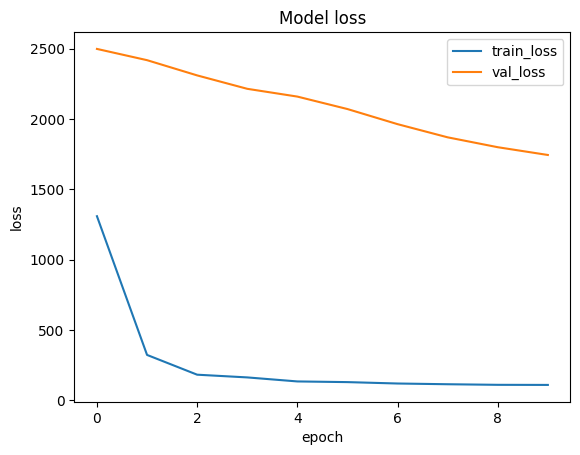

In [ ]:
# Plotting the training artifacts
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# Making prediction using the testing dataset
df_predict = model.predict(X_test)

5/5 [==============================] - 1s 140ms/step


In [ ]:
# Printing the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 41.573509467605994


In [ ]:
# Converting the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,12.137079,7.015721,5.880235,7.074103,11.614285,7.206654,13.253747,6.986501,7.210978,7.121660,...,9.142589,10.235949,11.858541,14.607387,6.697540,14.115220,8.867406,13.072775,9.114853,15.646564
1,12.111121,6.975589,5.842099,7.046036,11.598808,7.187114,13.214478,6.941385,7.161686,7.096557,...,9.103271,10.201423,11.824736,14.525631,6.679866,14.055708,8.841913,13.013176,9.077803,15.581143
2,12.025996,6.945414,5.824251,7.005626,11.520084,7.135653,13.129134,6.910985,7.135959,7.058788,...,9.052279,10.143517,11.746109,14.459735,6.631856,13.978459,8.791861,12.943893,9.030690,15.494357
3,12.067027,6.982324,5.864647,7.043129,11.562181,7.172240,13.177557,6.949683,7.183560,7.093405,...,9.097661,10.190035,11.792223,14.532633,6.675224,14.047783,8.829838,13.008758,9.074003,15.570858
4,12.099565,6.966572,5.832939,7.035583,11.581928,7.179424,13.198853,6.937532,7.145715,7.086254,...,9.088439,10.182092,11.821795,14.508528,6.668694,14.037525,8.832752,12.994574,9.064587,15.554847


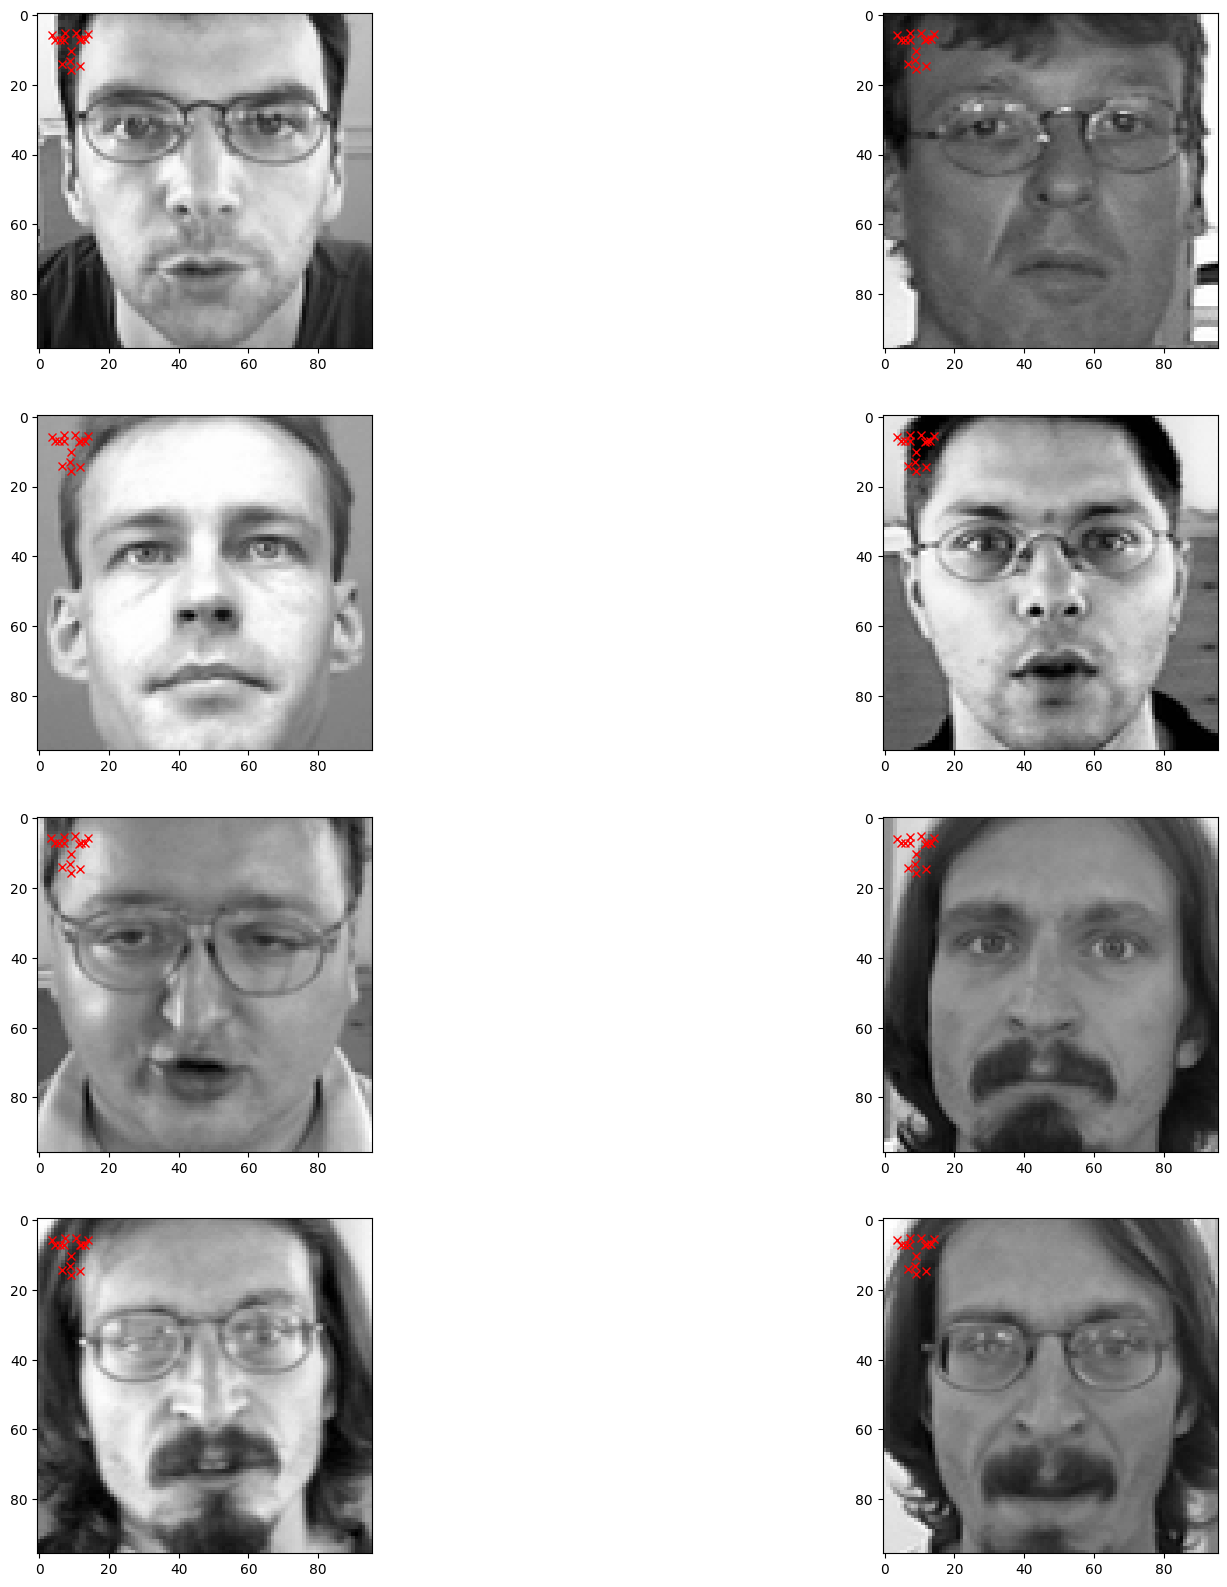

In [ ]:
# Plotting the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')